In [11]:
import pandas as pd
import json    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



train_data = []
#read json file into datframe
with open ('articles.json') as f_train : train_data = json.load(f_train)
df = pd.DataFrame (train_data, columns = ['body','title','category'])  

#clean data 


# check if there is a duplicate body 

from collections import Counter
# Eshra Comment: If I don't know what Counter does, I can't image what you meain with c. If I were you, I will name it count_similar_bodies as it gives me an insight what you are going to do. c = Counter(df['body'])
c.most_common(1)
#print ("",c.most_common(1))
#rint ("length =" ,len(c))
# Eshra Comment: unify the convension snake case (underscore) is python naming convension as you did in the rest of the codeorginalLength = (len(df['body']))
commLength = len(c)
if (commLength<orginalLength): print ('duplicate exit')
#remove duplicate row that contains duplicate body 
#keep first 
df.drop_duplicates(subset ="body",keep = 'first', inplace = True)
#print(df.count()) # Size after remove duplicates 
#CHECK ALL CATEGORY 
#print(pd.unique(df['category']))#3 CLASS  ['Engineering', 'Startups & Business', 'Product & Design']

df['cat_id']=df['category'].factorize()[0]; #map category to id from 0 to 2 

category_id_df = df[['category', 'cat_id']].drop_duplicates().sort_values('cat_id')

id_to_category = (category_id_df[['cat_id', 'category']].values)

category_to_id = dict(category_id_df.values)


category_to_id = dict(category_id_df.values)

#df.head()
#plot data 
#plot data to check if it is imbalanced or not 



from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word' ,sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.body).toarray()
labels = df.cat_id
#print(features.shape)



from sklearn.metrics import accuracy_score


model = LinearSVC()
# Eshra Comment: Also here X_train & y_train, I think it will be easier for the reviewer to understand if we rename them training_documents, training_target as having character like x,y,z is not good to use in code specially when you share with a first time reviewer who don't have any idea about your coding style.X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("SVM accuracy ",accuracy_score(y_test,y_pred))


duplicate exit
SVM accuracy  0.8854961832061069


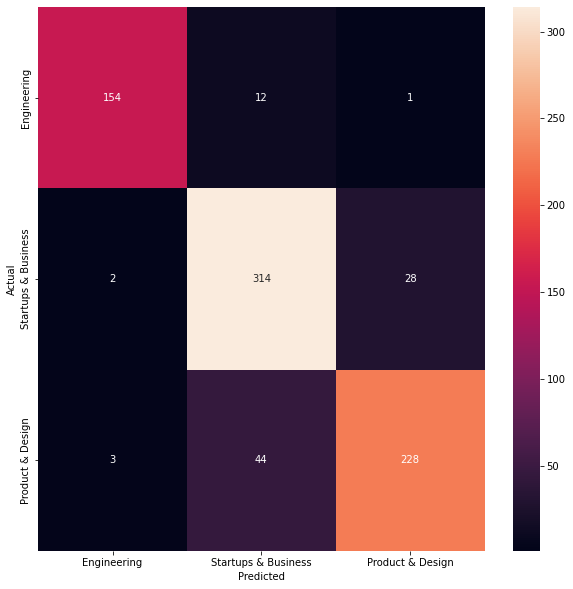

In [12]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()